### Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [13]:
k = 10

# Gera 200 números entre 0 e 10 * 2 * 3,14
x = np.linspace(0, k * 2 * np.pi,200)

# y1 é uma senoide e y2 tem 2x a frequência de y1
y1 = np.sin(x)
y2 = np.sin(2*x)

Text(0.5, 0.5, 'y1+y2')

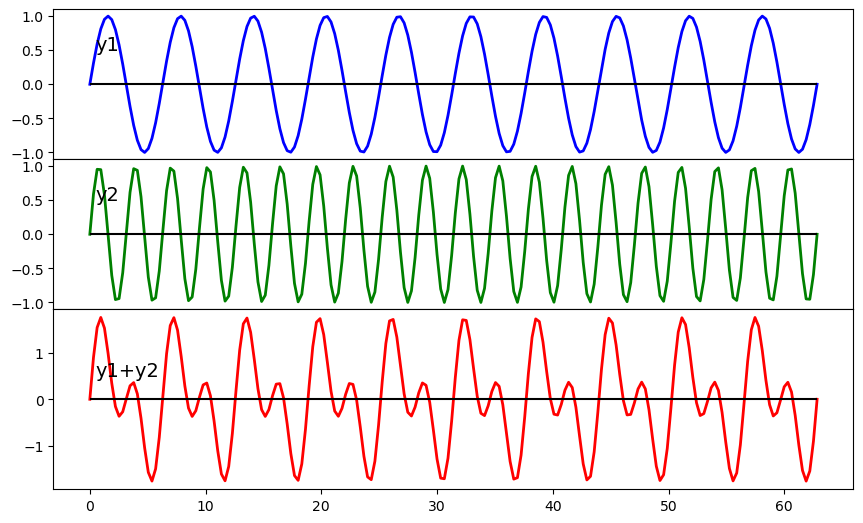

In [ ]:
# Posicionando as figuras
left, width = 0.1, 0.8 # Todos os gráficos começam no mesmo ponto horizontal (10% da esquerda e tem a mesma largura)
rect1 = [left, 0.65, width, 0.25] # Gráfico de Cima
rect2 = [left, 0.4, width, 0.25]  # Gráfico do Meio
rect3 = [left, 0.1, width, 0.3]   # Gráfico de Baixo

fig = plt.figure(figsize=(10,6))
# Sharex É um parâmetro muito útil que você usa ao criar um novo gráfico (um Axes) para vincular o seu eixo X ao de um gráfico já existente.
ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2, sharex=ax1)
ax3 = fig.add_axes(rect3, sharex=ax1)

ax1.plot(x,y1,color='b',lw=2)
ax2.plot(x,y2,color='g',lw=2)
ax3.plot(x,y1+y2, color='r',lw=2)

for ax in [ax1,ax2,ax3]:
    ax.hlines(0,0, k * 2 * np.pi, color='black')

ax1.text(0.5,0.5,'y1', fontsize=14)
ax2.text(0.5,0.5,'y2', fontsize=14)
ax3.text(0.5,0.5,'y1+y2', fontsize=14)

In [22]:
# Gerar dados para 3 segundos de audio a 44100 Hz
audio_rate = 44100
audio_duration = 3

num_audio_points = int(audio_rate * audio_duration)
k = 1000

x_audio = np.linspace(0,k * 2 * np.pi, num_audio_points)

y1_audio = np.sin(x_audio)
y2_audio = np.sin(x_audio * 2)

In [23]:
from IPython.display import Audio

display(Audio(data=y1_audio,rate=44100,normalize=False))
display(Audio(data=y2_audio,rate=44100,normalize=False))
display(Audio(data=y1_audio + y2_audio,rate=44100,normalize=True))

### Gerando e reproduzindo um acorde de Dó Maior com senoides

Este bloco de código gera as formas de onda para as notas Dó Central (C4), Mi Central (E4) e Sol Central (G4) como senoides e, em seguida, as soma para formar um acorde de Dó Maior, que é então reproduzido.

In [ ]:
frequency_c4 = 261.63
frequency_e4 = 329.63
frequency_g4 = 392.00

if 'audio_duration' not in locals():
    audio_duration = 3

if 'sample_rate' not in locals():
    sample_rate = 44100

t = np.linspace(0, audio_duration,int(sample_rate * audio_duration), endpoint=False)

c4_waveform = np.sin(2 * np.pi * frequency_c4 * t)
e4_waveform = np.sin(2 * np.pi * frequency_e4 * t)
g4_waveform = np.sin(2 * np.pi * frequency_g4 * t)

c_major_chord_waveform = c4_waveform + e4_waveform + g4_waveform

display(Audio(c_major_chord_waveform,rate=sample_rate,normalize=True))

### Função para simular timbre de piano

Esta função `simple_piano_timbre` simula um timbre básico de piano usando um número menor de harmônicos e um envelope de decaimento simples.

**Harmônicos e Timbre:**

O som de um instrumento musical, como o piano, não é apenas uma única frequência (a frequência fundamental da nota), mas sim uma combinação da frequência fundamental com múltiplos inteiros dessa frequência, chamados **harmônicos** ou sobretons. A intensidade (amplitude) relativa de cada harmônico é o que define o **timbre** característico do instrumento. Em um piano, os primeiros harmônicos são mais proeminentes, e sua combinação cria o som rico e complexo que reconhecemos.

**Envelope de Decaimento:**

Além dos harmônicos, a forma como a amplitude do som muda ao longo do tempo (o **envelope de amplitude**) é crucial para o timbre. Para um piano, o som tem um **ataque** rápido (quando a corda é golpeada), seguido por um **decaimento** gradual (a amplitude diminui à medida que a vibração da corda se dissipa). A função `simple_piano_timbre` simula um **envelope de decaimento** simples, onde a amplitude diminui linearmente ao longo da duração da nota, o que contribui para a característica de "piano" do som gerado.

In [ ]:
import numpy as np
from IPython.display import Audio

def simple_piano_timbre(frequency, duration, sample_rate, num_harmonics=10):

    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    waveform = np.zeros_like(t)

    decay_envelope = np.linspace(1, 0, len(t))

    for i in range(1, num_harmonics + 1):
        harmonic_frequency = i * frequency
        harmonic_waveform = np.sin(2 * np.pi * harmonic_frequency * t) * (1.0 / i) # Decrease amplitude of higher harmonics
        waveform += harmonic_waveform * decay_envelope # Apply decay envelope

    # Normalize the waveform
    waveform = waveform / np.max(np.abs(waveform)) if np.max(np.abs(waveform)) > 0 else waveform

    return waveform

In [28]:
# Gerar as formas de onda com timbre de piano simplificado

c4_simple_piano_waveform = simple_piano_timbre(frequency_c4, audio_duration, sample_rate)
e4_simple_piano_waveform = simple_piano_timbre(frequency_e4, audio_duration, sample_rate)
g4_simple_piano_waveform = simple_piano_timbre(frequency_g4, audio_duration, sample_rate)

# Somar as formas de onda para formar o acorde
c_major_simple_piano_chord_waveform = c4_simple_piano_waveform + e4_simple_piano_waveform + g4_simple_piano_waveform

# Reproduzir o acorde (normalizando para evitar clipping)
display(Audio(data=c_major_simple_piano_chord_waveform, rate=sample_rate, normalize=True))